# Problem 5

In [70]:
import matplotlib.pyplot as plt 
import numpy as np 


Define hyperparameters and datasets. To avoid confusion, we express matrices by familiar ways.  
To be more precise, we are accustomed to the case each $X_i$ and $Y$ is a column vector. To do this, we use transpose of $X$ mainly later and define $Y$ to be column vector by np.expand_dims.

In [71]:
d = 35
n_train, n_val, n_test = 300, 60, 30
np.random.seed(0)
beta = np.random.randn(d)
beta_true = beta / np.linalg.norm(beta)
# Generate and fix training data
X_train = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_train)])
Y_train = X_train @ beta_true + np.random.normal(loc = 0.0, scale = 0.5, size = n_train); Y_train = np.expand_dims(Y_train, axis=1)
# Generate and fix validation data (for tuning lambda). 
X_val = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_val)])
Y_val = X_val @ beta_true; Y_val = np.expand_dims(Y_val, axis=1)
# Generate and fix test data
X_test = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_test)])
Y_test = X_test @ beta_true; Y_test = np.expand_dims(Y_test, axis=1)

Our "familiar" construction applies again. To fit the dimension of columns and rows, linear weight $W$ has shape $(p,d)$, and the product $\tilde{X}$ becomes of the shape $(p,n)$. Also we denote $\theta$ as column vector.  
Unlike usual least-squre case, our loss contains weight decay term. By differentiating to $\theta$ as usual we get 
$\tilde{X}(\tilde{X}^\top \theta - Y) + \lambda I_p \theta = 0$.  
Therefore we get $\theta = (\tilde{X}\tilde{W}^\top + \lambda I_p)^{-1} \tilde{X} Y$, provided $\tilde{X}\tilde{X}^\top + \lambda I_p$ invertible.  
Of course that weight decay term should appears only at training step.


In [81]:
fixed_lambda = 0.01
lambda_list = [2 ** i for i in range(-6, 6)]
num_params = np.arange(1,1501,10)

errors_opt_lambda = []
errors_fixed_lambda = []
for p in num_params : 
    # fixed lambda
    W = np.random.normal(0, 1/p*np.ones((p,d)), size=(p,d))    # (p,d)
    X_tilde = np.maximum(np.zeros((p,n_train)), W@X_train.T)    # (p,n)
    theta = np.linalg.inv(X_tilde@X_tilde.T + fixed_lambda*np.identity(p))@X_tilde@Y_train    # (p,1)
    
    X_tilde = np.maximum(np.zeros((p,n_test)), W@X_test.T)    # (p,n)
    errors_fixed_lambda.append( np.linalg.norm(X_tilde.T@theta - Y_test)**2/2 )

    # tuned lambda
    thetas = []
    errors = []
    for lamb in lambda_list:
        X_tilde = np.maximum(np.zeros((p,n_train)), W@X_train.T)
        theta = np.linalg.inv(X_tilde@X_tilde.T + lamb*np.identity(p))@X_tilde@Y_train
        thetas.append(theta)

        X_tilde = np.maximum(np.zeros((p,n_val)), W@X_val.T)
        errors.append( np.linalg.norm(X_tilde.T@theta - Y_val)**2/2 )
    
    min_index = np.argmin(np.array(errors))
    X_tilde = np.maximum(np.zeros((p,n_test)), W@X_test.T)
    theta = thetas[min_index]
    errors_opt_lambda.append( np.linalg.norm(X_tilde.T@theta - Y_test)**2/2 )

Because of technical issues, I unwillingly exclude tex grammer in source code. But everything is same.  
scatter plot is fixed model and line plot is tuned model.  
To visualize better, I omit first six data. These errors are significantly high due to the number of parameters.  

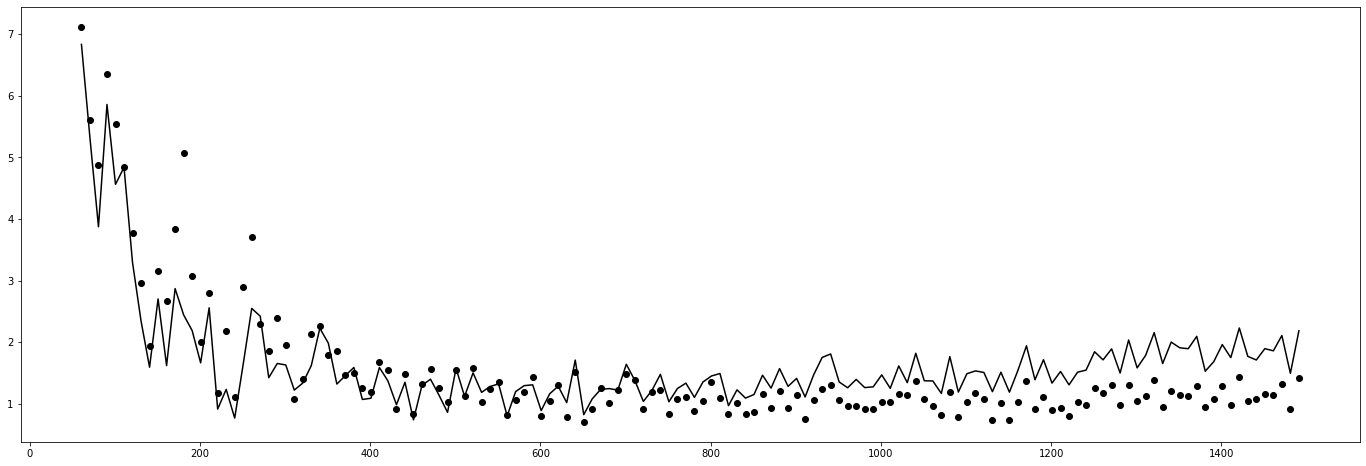

In [85]:
plt.figure(figsize = (24, 8))
plt.rc('text', usetex = False)

cut_from = 6
plt.scatter(num_params[cut_from:], errors_fixed_lambda[cut_from:], color = 'black',
            label = "Test error with fixed lambda = 0.01",
            )

plt.plot(num_params[cut_from:], errors_opt_lambda[cut_from:], 'k', label = "Test error with tuned lambda")
plt.show()

On x-axis (number of parameters) near 200, fixed model(scatter plot) shows relatively high loss compared to previous adjacent points.  
Tuned model, however, shows gradually decreasing losses.